The MEG parameterization assumes that the semi major axis of the galaxy is in x-axis. For that reason, we need to rotate the data for accomplish this requirement.

We already had funded the position angle (PA) of the galaxy, using high resolution imagens form HST. Now, we just rotate the grid of ALMA data (resampled) by this PA.

Another reason for this rotating is that our implementation of pseudo elliptical mass model also assumes that major axis is in x-axis.

In [1]:
from mpdaf.obj import Image, WCS, Cube
import numpy as np
import matplotlib.pyplot as plt
import mpdaf.obj
import astropy.units as u



data_folder = "/home/carlos/Desktop/HST Data Reduction/Data Alma/"

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
[INFO] 211 x 211 Image (/home/carlos/Desktop/HST Data Reduction/Data Alma/ALMA_resampled.fits)
[INFO] .data(211 x 211) (no unit), no noise
[INFO] center:(00:39:06.5525,09:03:11.5598) size:(4.220",4.220") step:(0.020",0.020") rot:-0.0 deg frame:FK5


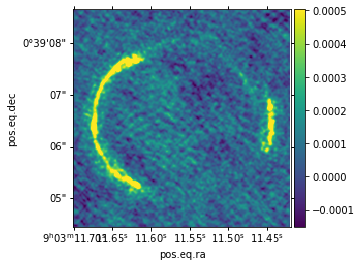

In [2]:
original_img = Image(data_folder+"ALMA_resampled.fits")
original_img.plot(zscale=True, colorbar="v", use_wcs=True)
original_img.info()

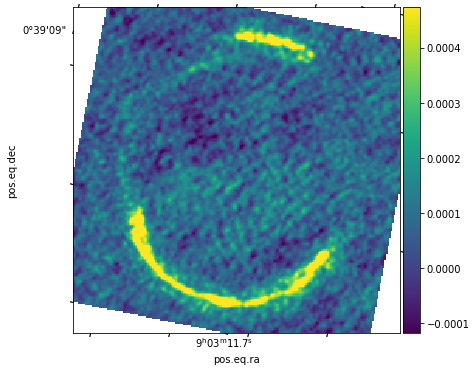

In [4]:
PA = 11.6                        #Position angle [DEG] from HST data, find using find_my_galaxy

plt.figure(figsize=(8,6))
rot_img = original_img.rotate(90-PA, interp= "linear", reshape=False)   #Rot img
rot_img.plot(use_wcs=True,zscale=True, colorbar="v")

Now we want to cut the image around the center of the lens galaxy. It is usefull because its assumes that the lens light are centered near (0,0) px. Because of that, it is commom to assume that the mass center is coincident with the light center.

For that,are using the catalogue by Negrello+, 2017, ID: J/MNRAS/465,3558

In [5]:
center_deg = [0.6518189, 135.7982269] #DEC, RA J200

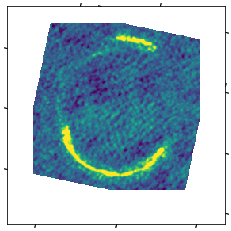

In [8]:
#Now we cut ALMA img around center_deg 
alma_cut = rot_img.subimage(center=center_deg, size=(5.5, 5.5), unit_center=u.deg, unit_size=u.arcsecond)
alma_cut.plot(zscale=True, use_wcs=True)

In [9]:
alma_cut.info()

[INFO] 275 x 275 Image (/home/carlos/Desktop/HST Data Reduction/Data Alma/ALMA_resampled.fits)
[INFO] .data(275 x 275) (no unit), no noise
[INFO] center:(00:39:06.5456,09:03:11.5746) size:(5.500",5.500") step:(0.020",0.020") rot:78.4 deg frame:FK5


In [10]:
alma_cut.data.data[ np.where(alma_cut.data.data[:] == 0)] = 0.0

In [11]:
#Remove nan's
for i in range(alma_cut.shape[0]):
    for j in range(alma_cut.shape[1]):
        if np.isnan(alma_cut[i,j]):
            alma_cut[i,j] = 0
        

In [12]:
alma_cut.info()

[INFO] 275 x 275 Image (/home/carlos/Desktop/HST Data Reduction/Data Alma/ALMA_resampled.fits)
[INFO] .data(275 x 275) (no unit), no noise
[INFO] center:(00:39:06.5456,09:03:11.5746) size:(5.500",5.500") step:(0.020",0.020") rot:78.4 deg frame:FK5


In [13]:
alma_cut.write(data_folder+"Alma_with_lens_center.fits")